In [10]:
import glob
import matplotlib.pyplot as plt

from preprocessing.model_helper import *

from preprocessing.paths import READY_MIDI_PATH

In [11]:
# seed_sequence = generate_random_seed_sequence(word_to_idx, 10)
# generated = generate_sequence(
#     model, seed_sequence, word_to_idx, idx_to_word, seq_length
# )
# with open("sth.txt", "w") as f:
#     f.write("\n".join(generated))
# print("Generated sequence:", " ".join(generated))

In [12]:
# Build vocab and genre mappings
word_to_idx, idx_to_word = build_vocab(READY_MIDI_PATH)
genre_to_idx = {
    genre: idx for idx, genre in enumerate(sorted(os.listdir(READY_MIDI_PATH)))
}
vocab_size = len(word_to_idx)
genre_size = len(genre_to_idx)
print(os.listdir(READY_MIDI_PATH))
print(genre_to_idx)

['Ambient', 'Blues', 'Children', 'Classical', 'Country', 'Electronic', 'Folk', 'Jazz', 'Latin', 'Pop', 'Rap', 'Reggae', 'Religious', 'Rock', 'Soul', 'Soundtracks', 'Unknown', 'World']
{'Ambient': 0, 'Blues': 1, 'Children': 2, 'Classical': 3, 'Country': 4, 'Electronic': 5, 'Folk': 6, 'Jazz': 7, 'Latin': 8, 'Pop': 9, 'Rap': 10, 'Reggae': 11, 'Religious': 12, 'Rock': 13, 'Soul': 14, 'Soundtracks': 15, 'Unknown': 16, 'World': 17}


In [13]:
def train_all_tracks(
    save_file,
    seq_length=64,
    batch_size=64,
    embed_size=128,
    hidden_size=256,
    num_layers=2,
    num_epochs=10,
    lr=0.001,
):
    print("Training on all tracks...")

    # Split dataset
    all_files = glob.glob(f"{READY_MIDI_PATH}/**/*.txt", recursive=True)
    train_files, test_files = split_dataset(all_files)

    # Load sequences
    train_inputs, train_outputs, train_genres = load_sequences(
        train_files, word_to_idx, genre_to_idx, seq_length
    )
    test_inputs, test_outputs, test_genres = load_sequences(
        test_files, word_to_idx, genre_to_idx, seq_length
    )

    # Create data loaders
    train_loader = create_loaders(train_inputs, train_outputs, train_genres, batch_size)
    test_loader = create_loaders(test_inputs, test_outputs, test_genres, batch_size)

    # Initialize and train model
    model = LSTMGenerator(vocab_size, genre_size, embed_size, hidden_size, num_layers)
    train_losses, test_losses = train_model(
        model, train_loader, test_loader, num_epochs, save_file, lr
    )

    print("Training completed and model saved!")

    plt.plot(train_losses, label="Training loss")
    plt.plot(test_losses, label="Validation loss")
    plt.legend(frameon=False)


# Training Script for Piano-like Tracks
def train_piano_tracks(
    save_file,
    seq_length=64,
    batch_size=64,
    embed_size=128,
    hidden_size=256,
    num_layers=2,
    num_epochs=10,
    lr=0.001,
):
    print("Training on piano-like tracks...")

    # Filter for piano-like tracks
    piano_files = glob.glob(f"{READY_MIDI_PATH}/**/*piano*.txt", recursive=True)
    train_files, test_files = split_dataset(piano_files)

    # Load sequences
    train_inputs, train_outputs, train_genres = load_sequences(
        train_files, word_to_idx, genre_to_idx, seq_length
    )
    test_inputs, test_outputs, test_genres = load_sequences(
        test_files, word_to_idx, genre_to_idx, seq_length
    )

    # Create data loaders
    train_loader = create_loaders(train_inputs, train_outputs, train_genres, batch_size)
    test_loader = create_loaders(test_inputs, test_outputs, test_genres, batch_size)

    # Initialize and train model
    model = LSTMGenerator(vocab_size, genre_size, embed_size, hidden_size, num_layers)
    train_losses, test_losses = train_model(
        model, train_loader, test_loader, num_epochs, save_file, lr
    )

    print("Training completed and model saved!")

    plt.plot(train_losses, label="Training loss")
    plt.plot(test_losses, label="Validation loss")
    plt.legend(frameon=False)

Training on piano-like tracks...
Epoch 1/10 	Training loss: 2.455 	Test loss: 2.577
Validation loss decreased (inf --> 2.577).  Saving model ...
Epoch 2/10 	Training loss: 2.145 	Test loss: 2.520
Validation loss decreased (2.577 --> 2.520).  Saving model ...
Epoch 3/10 	Training loss: 2.106 	Test loss: 2.499
Validation loss decreased (2.520 --> 2.499).  Saving model ...
Epoch 4/10 	Training loss: 3.417 	Test loss: 8.841
Epoch 5/10 	Training loss: 21.620 	Test loss: 24.168
Epoch 6/10 	Training loss: 22.343 	Test loss: 19.096
Epoch 7/10 	Training loss: 15.814 	Test loss: 13.546
Epoch 8/10 	Training loss: 12.121 	Test loss: 11.064
Epoch 9/10 	Training loss: 10.170 	Test loss: 9.839
Epoch 10/10 	Training loss: 8.981 	Test loss: 8.956
Training completed and model saved!


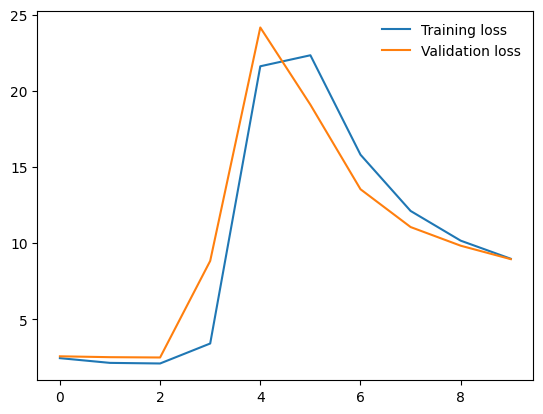

In [14]:
train_piano_tracks("piano_tracks_model.pt")